In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import PIL

In [2]:
horse=pd.read_csv("horse.csv")
horse.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
horse.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [4]:
horse.info()
horse.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [5]:
horse.shape

(299, 28)

In [6]:
horse.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [7]:
horse["surgery"].value_counts()

yes    180
no     119
Name: surgery, dtype: int64

In [8]:
# since there are many null values and if am not removing the data and replacing it with mean value for integers 


In [9]:
for i in horse.columns:
    if((i == "hospital_number") or (i == "rectal_temp") or (i == "pulse") or (i == "respiratory_rate") or (i == "nasogastric_reflux_ph") or (i == "packed_cell_volume")or (i == "total_protein") or (i == "abdomo_protein") or (i == "lesion_1") or (i == "lesion_2") or (i == "lesion_3")):
        if (horse[i].isna().sum()!=0):
            horse[i].fillna(horse[i].mean(),inplace=True)
    else:
        if (horse[i].isna().sum()!=0):
            horse[i].fillna(horse[i].mode()[0],inplace=True)
            
        

In [10]:
horse.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [11]:
c=horse.groupby(["age","temp_of_extremities","surgery"]).count()["lesion_1"].unstack()
c

surgery                      no   yes
age   temp_of_extremities            
adult cold                  7.0  19.0
      cool                 55.0  94.0
      normal               33.0  38.0
      warm                 18.0  11.0
young cold                  NaN   1.0
      cool                  3.0  12.0
      normal                2.0   5.0
      warm                  1.0   NaN

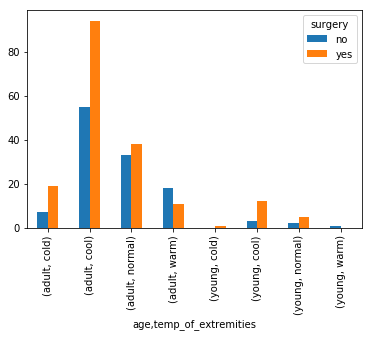

In [12]:
c.plot.bar()
plt.show()

In [13]:
le=preprocessing.LabelEncoder()
for i in horse.columns:
    if((i != "hospital_number") and  (i != "rectal_temp") and (i != "pulse") and (i != "respiratory_rate") and (i != "nasogastric_reflux_ph") and  (i != "packed_cell_volume")and  (i != "total_protein") and (i != "abdomo_protein") and (i != "lesion_1") and (i != "lesion_2") and (i != "lesion_3")):
        horse[i]=le.fit_transform(horse[i])
        
horse.head(3)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,38.5,66.0,28.0,1,3,3,2,...,45.0,8.4,1,3.039604,0,0,11300,0,0,0
1,1,0,534817,39.2,88.0,20.0,1,2,4,1,...,50.0,85.0,1,2.000000,1,0,2208,0,0,0
2,0,0,530334,38.3,40.0,24.0,2,2,5,1,...,33.0,6.7,1,3.039604,2,0,0,0,0,1


In [14]:
horse["surgery"].value_counts()

1    180
0    119
Name: surgery, dtype: int64

In [15]:
#0-> no and 1-> yes  age 0->adult 1->young

In [16]:
scaler = MinMaxScaler()

norm_horse= pd.DataFrame(scaler.fit_transform(horse))
norm_horse.head(3)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.002428,0.574074,0.233766,0.227273,0.333333,1.000000,0.6,1.0,...,0.423077,0.059510,0.5,0.29396,0.0,0.0,0.274872,0.0,0.0,0.0
1,1.0,0.0,0.003414,0.703704,0.376623,0.136364,0.333333,0.666667,0.8,0.5,...,0.519231,0.953326,0.5,0.19000,0.5,0.0,0.053710,0.0,0.0,0.0
2,0.0,0.0,0.002477,0.537037,0.064935,0.181818,0.666667,0.666667,1.0,0.5,...,0.192308,0.039673,0.5,0.29396,1.0,0.0,0.000000,0.0,0.0,1.0


In [17]:
norm_horse.columns=["surgery","age","hospital_number","rectal_temp","pulse","respiratory_rate","temp_of_extremities","peripheral_pulse","mucous_membrane","capillary_refill_time","pain","peristalsis","abdominal_distention","nasogastric_tube","nasogastric_reflux","nasogastric_reflux_ph","rectal_exam_feces","abdomen","packed_cell_volume","total_protein","abdomo_appearance","abdomo_protein","outcome","surgical_lesion","lesion_1","lesion_2","lesion_3","cp_data"]

In [18]:
norm_horse.head(3)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0.0,0.0,0.002428,0.574074,0.233766,0.227273,0.333333,1.000000,0.6,1.0,...,0.423077,0.059510,0.5,0.29396,0.0,0.0,0.274872,0.0,0.0,0.0
1,1.0,0.0,0.003414,0.703704,0.376623,0.136364,0.333333,0.666667,0.8,0.5,...,0.519231,0.953326,0.5,0.19000,0.5,0.0,0.053710,0.0,0.0,0.0
2,0.0,0.0,0.002477,0.537037,0.064935,0.181818,0.666667,0.666667,1.0,0.5,...,0.192308,0.039673,0.5,0.29396,1.0,0.0,0.000000,0.0,0.0,1.0


In [21]:
norm_horse.var().sort_values()

lesion_3                 0.003344
lesion_2                 0.008372
abdomo_protein           0.012996
rectal_temp              0.014746
nasogastric_reflux_ph    0.016229
lesion_1                 0.017308
pulse                    0.031815
respiratory_rate         0.032457
packed_cell_volume       0.036363
peripheral_pulse         0.043815
capillary_refill_time    0.050908
temp_of_extremities      0.068528
abdomo_appearance        0.072916
age                      0.074072
mucous_membrane          0.088445
total_protein            0.090664
peristalsis              0.093765
pain                     0.098936
abdomen                  0.099751
hospital_number          0.102419
nasogastric_reflux       0.116832
abdominal_distention     0.122117
rectal_exam_feces        0.153709
nasogastric_tube         0.181163
outcome                  0.185304
cp_data                  0.222217
surgical_lesion          0.232430
surgery                  0.240399
dtype: float64

In [22]:
x=norm_horse.loc[:,["surgical_lesion","surgery","cp_data","outcome","nasogastric_tube","rectal_exam_feces","abdominal_distention","nasogastric_reflux","hospital_number","abdomen","pain","peristalsis","total_protein"]]

In [24]:
x.corr()

,surgical_lesion,surgery,cp_data,outcome,nasogastric_tube,rectal_exam_feces,abdominal_distention,nasogastric_reflux,hospital_number,abdomen,pain,peristalsis,total_protein
surgical_lesion,1.000000,0.605023,0.045630,-0.332933,0.023299,-0.199348,-0.149064,-0.211128,0.102425,-0.316903,0.276427,-0.148574,-0.113224
surgery,0.605023,1.000000,0.005827,-0.189222,0.066982,-0.171611,-0.150197,-0.083910,0.126044,-0.297202,0.228871,-0.061546,0.042420
cp_data,0.045630,0.005827,1.000000,-0.078066,-0.011439,0.090057,0.101150,-0.030299,0.096711,0.062981,0.029084,0.046158,-0.429219
outcome,-0.332933,-0.189222,-0.078066,1.000000,0.049156,0.193004,0.112309,0.181422,-0.106396,0.214875,-0.161964,0.165844,0.245657
nasogastric_tube,0.023299,0.066982,-0.011439,0.049156,1.000000,-0.052953,-0.053246,0.102928,-0.032929,0.060445,0.099528,-0.018284,-0.026171
rectal_exam_feces,-0.199348,-0.171611,0.090057,0.193004,-0.052953,1.000000,0.009803,0.072262,-0.006083,0.237937,-0.130667,0.113293,-0.054706
abdominal_distention,-0.149064,-0.150197,0.101150,0.112309,-0.053246,0.009803,1.000000,0.058756,-0.080212,0.114305,-0.065390,-0.027118,-0.012287
nasogastric_reflux,-0.211128,-0.083910,-0.030299,0.181422,0.102928,0.072262,0.058756,1.000000,0.042219,0.071811,-0.050850,0.146367,0.108381
hospital_number,0.102425,0.126044,0.096711,-0.106396,-0.032929,-0.006083,-0.080212,0.042219,1.000000,-0.155145,0.120780,0.065362,-0.212407
abdomen,-0.316903,-0.297202,0.062981,0.214875,0.060445,0.237937,0.114305,0.071811,-0.155145,1.000000,-0.296097,0.108243,-0.029447


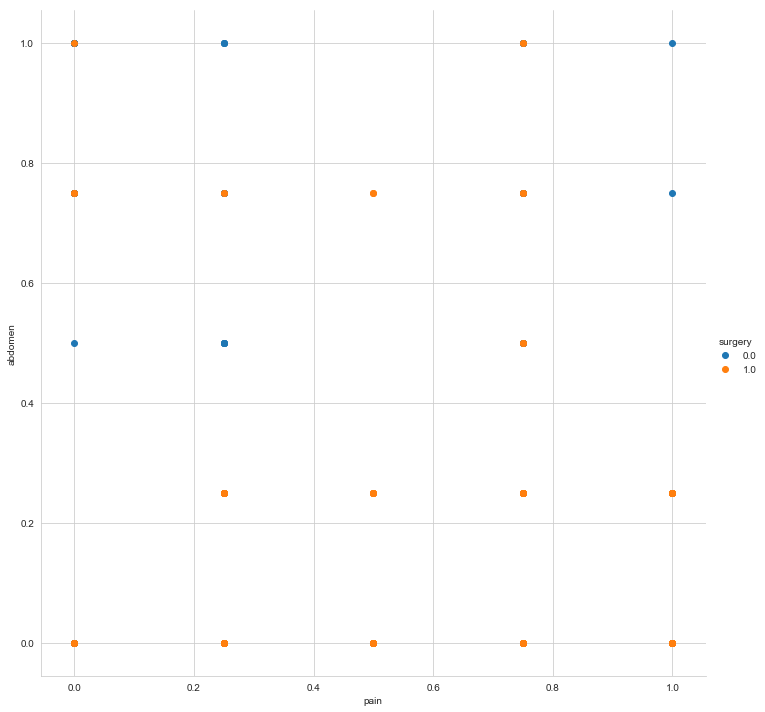

In [25]:
sb.set_style("whitegrid")
sb.FacetGrid(norm_horse,hue="surgery",size=10).map(plt.scatter,"pain","abdomen").add_legend()
plt.show() 

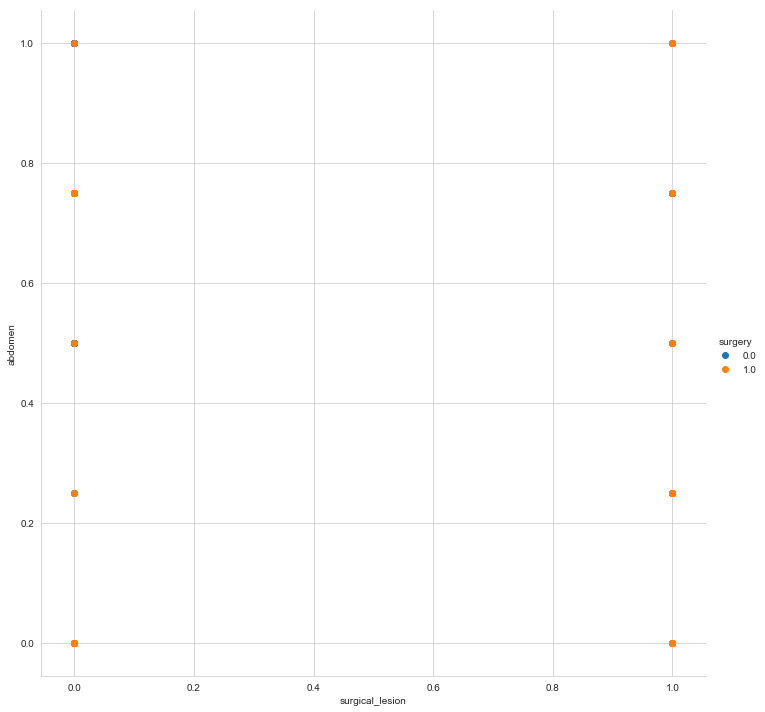

In [26]:
sb.set_style("whitegrid")
sb.FacetGrid(norm_horse,hue="surgery",size=10).map(plt.scatter,"surgical_lesion","abdomen").add_legend()
plt.show() 

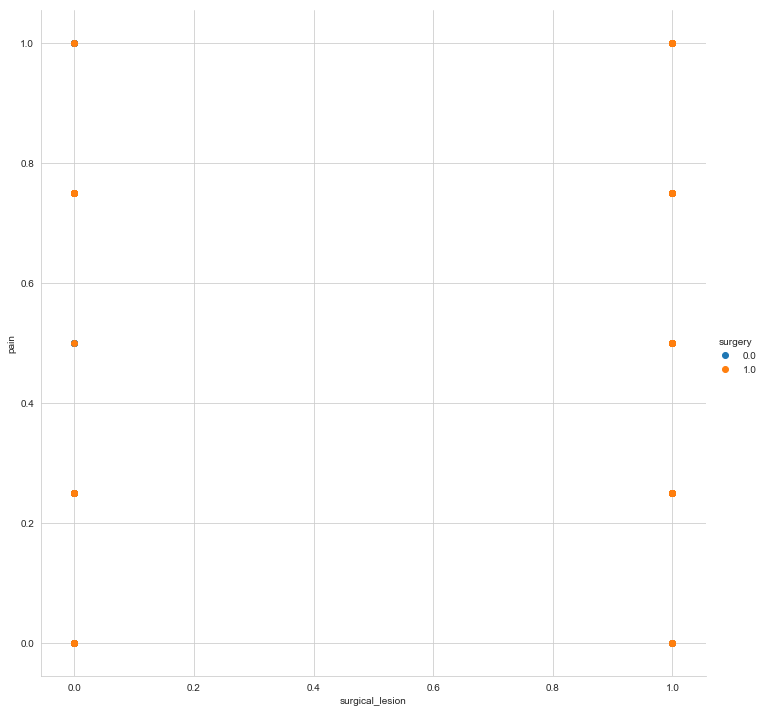

In [27]:
sb.set_style("whitegrid")
sb.FacetGrid(norm_horse,hue="surgery",size=10).map(plt.scatter,"surgical_lesion","pain").add_legend()
plt.show() 

In [29]:
feature=norm_horse.loc[:,["surgical_lesion","abdomen","pain"]]
dependent=norm_horse.loc[:,["surgery"]]
horse_train,horse_test,label_train,label_test=train_test_split(feature,dependent,test_size=0.30,random_state=0)
display(horse_train.shape)
display(horse_test.shape)

(209, 3)

(90, 3)

In [30]:
mod=LogisticRegression()

mod.fit(horse_train,label_train)
print("train accuracy")
display(mod.score(horse_train,label_train))

print("test accuracy")
display(mod.score(horse_test,label_test))

train accuracy


0.8277511961722488

test accuracy


0.7777777777777778

In [31]:
train_prediction=mod.predict(horse_train)
test_prediction=mod.predict(horse_test)
train_conf_matrix=confusion_matrix(label_train,train_prediction)
test_conf_matrix=confusion_matrix(label_test,test_prediction)

In [32]:
pd.DataFrame(train_conf_matrix,columns=mod.classes_,index=mod.classes_)

,0.0,1.0
0.0,72,22
1.0,14,101


In [33]:
pd.DataFrame(test_conf_matrix,columns=mod.classes_,index=mod.classes_)

,0.0,1.0
0.0,14,11
1.0,9,56


In [34]:
print(classification_report(label_train,train_prediction))

              precision    recall  f1-score   support

         0.0       0.84      0.77      0.80        94
         1.0       0.82      0.88      0.85       115

   micro avg       0.83      0.83      0.83       209
   macro avg       0.83      0.82      0.82       209
weighted avg       0.83      0.83      0.83       209



In [35]:
print(classification_report(label_test,test_prediction))

              precision    recall  f1-score   support

         0.0       0.61      0.56      0.58        25
         1.0       0.84      0.86      0.85        65

   micro avg       0.78      0.78      0.78        90
   macro avg       0.72      0.71      0.72        90
weighted avg       0.77      0.78      0.77        90



In [36]:
# decision tree algorithm 

model=DecisionTreeClassifier()

model.fit(horse_train,label_train)
print("train accuracy")
display(model.score(horse_train,label_train))

print("test accuracy")
display(model.score(horse_test,label_test))

train accuracy


0.8421052631578947

test accuracy


0.7555555555555555

In [37]:
# using min_sample_split and min_impurity_decrease

model1=DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)

model1.fit(horse_train,label_train)
print("train accuracy")
display(model1.score(horse_train,label_train))

print("test accuracy")
display(model1.score(horse_test,label_test))

train accuracy


0.8277511961722488

test accuracy


0.7777777777777778

In [38]:
model2=DecisionTreeClassifier(min_samples_split=20,min_impurity_decrease=0.1)


model2.fit(horse_train,label_train)
print("train accuracy")
display(model2.score(horse_train,label_train))

print("test accuracy")
display(model2.score(horse_test,label_test))

train accuracy


0.8277511961722488

test accuracy


0.7777777777777778

In [39]:
# k nearest algorithm    only including DB AND TB since they are correlated with class 


kmodel=KNeighborsClassifier(n_neighbors=3,metric="euclidean")


kmodel.fit(horse_train,label_train)
print("train accuracy")
display(kmodel.score(horse_train,label_train))

print("test accuracy")
display(kmodel.score(horse_test,label_test))

train accuracy


0.8421052631578947

test accuracy


0.7777777777777778

In [40]:
# changing the n_neighbors value to 5 and validating it


k1model=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
k1model.fit(horse_train,label_train)
print("train accuracy")
display(k1model.score(horse_train,label_train))

print("test accuracy")
display(k1model.score(horse_test,label_test))

train accuracy


0.8277511961722488

test accuracy


0.7777777777777778

In [41]:
smodel=SVC(kernel="rbf")
smodel.fit(horse_train,label_train)
print("train accuracy")
display(smodel.score(horse_train,label_train))

print("test accuracy")
display(smodel.score(horse_test,label_test))


train accuracy


0.8277511961722488

test accuracy


0.7777777777777778